# **Bike Sales Products in Europe**

# 🔍 Project Overview

In this project, I explore a dataset containing bike sales products data across various European and Non-European countries and their regions/states. The dataset consists of 18 columns, with the main focus on the Sales column, which represents the revenue generated by bike purchases.

The goal of this analysis is to extract valuable and meaningful insights from the dataset using data visualization and exploratory data analysis (EDA) techniques. These insights can help identify sales patterns, customer demographics, and product performance.

# 🧠 Objectives

Analyze total sales across each country and state within Europe.

Understand sales trends based on gender (Male vs Female customers).

Explore the number of bikes sold per product and their total sales.

Identify the most popular products and the highest revenue generators.

Visualize relationships and trends using graphs for easier interpretation.

# 📁 Dataset Summary

🔢 18 columns including:

Country, State, Gender, Product Category, Product, Profit, Quantity, Age, etc.

🎯 Target column: Profit

# 🛠️ Tools & Libraries Used

Python

Pandas for data manipulation

Matplotlib and Seaborn for visualization

Jupyter Notebook for analysis

# 📌 What You'll Find in This Analysis

Sales heatmaps by country and products

Pie charts showing sales by gender and product

Insights into customer behavior and purchasing trends

Visual storytelling to highlight key findings

In [1]:
# Step 0: Import libraries
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv('/content/Sales.csv')

# Step 2: View basic info
print(df.head())          # Preview first 5 rows
print(df.info())          # Check datatypes & nulls
print(df.describe())      # Get numeric summary

         Date  Day     Month  Year  Customer_Age       Age_Group  \
0  2013-11-26   26  November  2013            19     Youth (<25)   
1  2015-11-26   26  November  2015            19     Youth (<25)   
2  2014-03-23   23     March  2014            49  Adults (35-64)   
3  2016-03-23   23     March  2016            49  Adults (35-64)   
4  2014-05-15   15       May  2014            47  Adults (35-64)   

  Customer_Gender    Country             State Product_Category Sub_Category  \
0               M     Canada  British Columbia      Accessories   Bike Racks   
1               M     Canada  British Columbia      Accessories   Bike Racks   
2               M  Australia   New South Wales      Accessories   Bike Racks   
3               M  Australia   New South Wales      Accessories   Bike Racks   
4               F  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  \
0  Hitch Rack - 4-Bike         

Now we will perform a basic exploration of the data. For the columns in the database, if there is missing data, or there is unique data.

In [2]:
# Columns in dataset
print(df.columns)

# Check for missing values
print(df.isnull().sum())

# Count of unique values per column
print(df.nunique())

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')
Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64
Date                1884
Day                   31
Month                 12
Year                   6
Customer_Age          70
Age_Group              4
Customer_Gender        2
Country                6
State                 53
Product_Category       3
Sub_Category          17
Product              130
Order_Quantity     

# Total Sales by Country

Now we will explore the specific sales figures for each country.

# Total Sales by State (within countries)

Now we will delve deeper into each state to see what data we can gather.

In [12]:
sales_by_state = df.groupby(['Country', 'State'])['Profit'].sum().sort_values(ascending=False)
print(sales_by_state)


Country         State              
United States   California             7772869
United Kingdom  England                4413853
Canada          British Columbia       3693348
Australia       New South Wales        3133684
United States   Washington             1997550
Australia       Queensland             1619158
                Victoria               1428026
United States   Oregon                 1258168
Germany         Hessen                  813402
                Nordrhein-Westfalen     647757
                Saarland                634294
                Hamburg                 616499
                Bayern                  576691
France          Seine (Paris)           511167
                Nord                    465545
Australia       South Australia         424839
France          Essonne                 393848
                Hauts de Seine          364137
                Seine Saint Denis       355727
                Yveline                 178289
Australia       Tasmania

# Sales by Gender

Now we will take a closer look at which gender makes the most bicycle purchases.

In [13]:
sales_by_gender = df.groupby('Customer_Gender')['Profit'].sum()
print(sales_by_gender)

Customer_Gender
F    15733868
M    16487232
Name: Profit, dtype: int64


Based on our data, we can see that there is not much difference between purchases made by men and women.

# Sales and Quantity by Product

Now we will see the quantity per product.

In [50]:
product_sales = df.groupby('Product')[['Order_Quantity', 'Profit']].sum().sort_values(by='Profit', ascending=False)
print(product_sales)

                         Order_Quantity   Profit
Product                                         
Mountain-200 Black, 38             1642  1310464
Road-150 Red, 62                   1191  1243755
Mountain-200 Silver, 42            1461  1231452
Sport-100 Helmet, Red             63663  1191402
Mountain-200 Silver, 38            1477  1165560
...                                 ...      ...
Touring-3000 Yellow, 62              83    18371
Touring-3000 Blue, 50                70    13424
Mountain-500 Silver, 48              52     9778
Road-650 Red, 52                     52     9345
Mountain-500 Black, 52               40     7487

[130 rows x 2 columns]


# Sales by Product Category

Now we will see what categories each product falls into.

In [18]:
category_sales = df.groupby('Product_Category')['Profit'].sum().sort_values(ascending=False)
print(category_sales)

Product_Category
Bikes          20519276
Accessories     8862377
Clothing        2839447
Name: Profit, dtype: int64


# Average Sales by Age Group

Now let's see what the average age of highest sales is.

In [31]:
# Optional: Create age bins
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20s', '30s', '40s', '50s', '60+']
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=bins, labels=labels)

sales_by_age = df.groupby('Age_Group')['Profit'].mean().sort_values(ascending=True)
print(sales_by_age)

Age_Group
<20    227.807074
60+    254.960679
50s    277.075162
40s    290.048039
30s    291.083164
20s    291.785111
Name: Profit, dtype: float64


/tmp/ipython-input-2151421006.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_age = df.groupby('Age_Group')['Profit'].mean().sort_values(ascending=True)


# Sales Over Time

Using the dates, we will see sales over time.

In [30]:
# Reset index if 'Date' is already the index
if 'Date' not in df.columns:
    df.reset_index(inplace=True)

# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set as index
df.set_index('Date', inplace=True)

# Sales trend
monthly_sales = df['Revenue'].resample('ME').sum()
print(monthly_sales)

Date
2011-01-31     675193
2011-02-28     637598
2011-03-31     708517
2011-04-30     698782
2011-05-31     734537
               ...   
2016-03-31    2608663
2016-04-30    2756864
2016-05-31    3264343
2016-06-30    3586300
2016-07-31     499960
Freq: ME, Name: Revenue, Length: 67, dtype: int64


# Top 10 Products by **Revenue**

What are the 10 best-selling products?

In [32]:
top_products = df.groupby('Product')['Profit'].sum().sort_values(ascending=False).head(10)
print(top_products)


Product
Mountain-200 Black, 38     1310464
Road-150 Red, 62           1243755
Mountain-200 Silver, 42    1231452
Sport-100 Helmet, Red      1191402
Mountain-200 Silver, 38    1165560
Sport-100 Helmet, Black    1141330
Mountain-200 Black, 46     1080672
Road-150 Red, 52           1053260
Sport-100 Helmet, Blue     1048446
Mountain-200 Black, 42     1036542
Name: Profit, dtype: int64


# Lowest Performing Products

And which ones should we take off the market?

In [34]:
low_sales = df.groupby('Product')['Profit'].sum().sort_values().head(10)
print(low_sales)


Product
Mountain-500 Black, 52      7487
Road-650 Red, 52            9345
Mountain-500 Silver, 48     9778
Touring-3000 Blue, 50      13424
Touring-3000 Yellow, 62    18371
Mountain-500 Silver, 52    19074
Touring-3000 Blue, 54      19634
Mountain-500 Silver, 44    20070
Touring-3000 Yellow, 58    20997
Road-650 Black, 44         21729
Name: Profit, dtype: int64


# Visualizations

In the following section, we will show the extracted information, but this time with graphs.

In [35]:
import matplotlib.pyplot as plt

Top 10 Most Sold Products

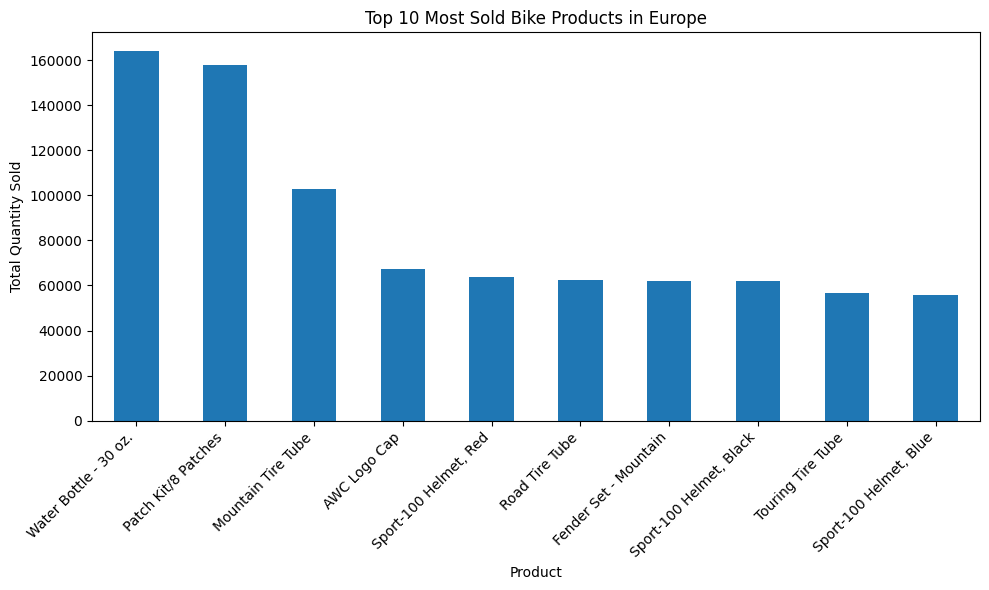

In [37]:
top_products = df.groupby('Product')['Order_Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Most Sold Bike Products in Europe')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Sales by Gender and Product

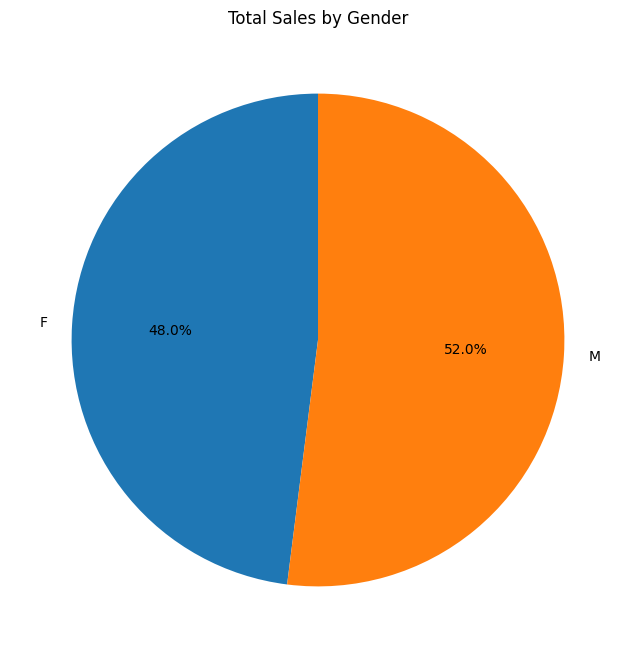

In [42]:
# Calculate total sales by gender
total_sales_by_gender = df.groupby('Customer_Gender')['Order_Quantity'].sum()

# Create the pie chart
plt.figure(figsize=(8, 8))
total_sales_by_gender.plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.title('Total Sales by Gender')
plt.ylabel('') # Remove the 'Order_Quantity' y-axis label for better visualization
plt.show()


Sales by Age Group and Product

/tmp/ipython-input-3808451817.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_product_sales_filtered = df_filtered.groupby(['Age_Group', 'Product'])['Order_Quantity'].sum().unstack()


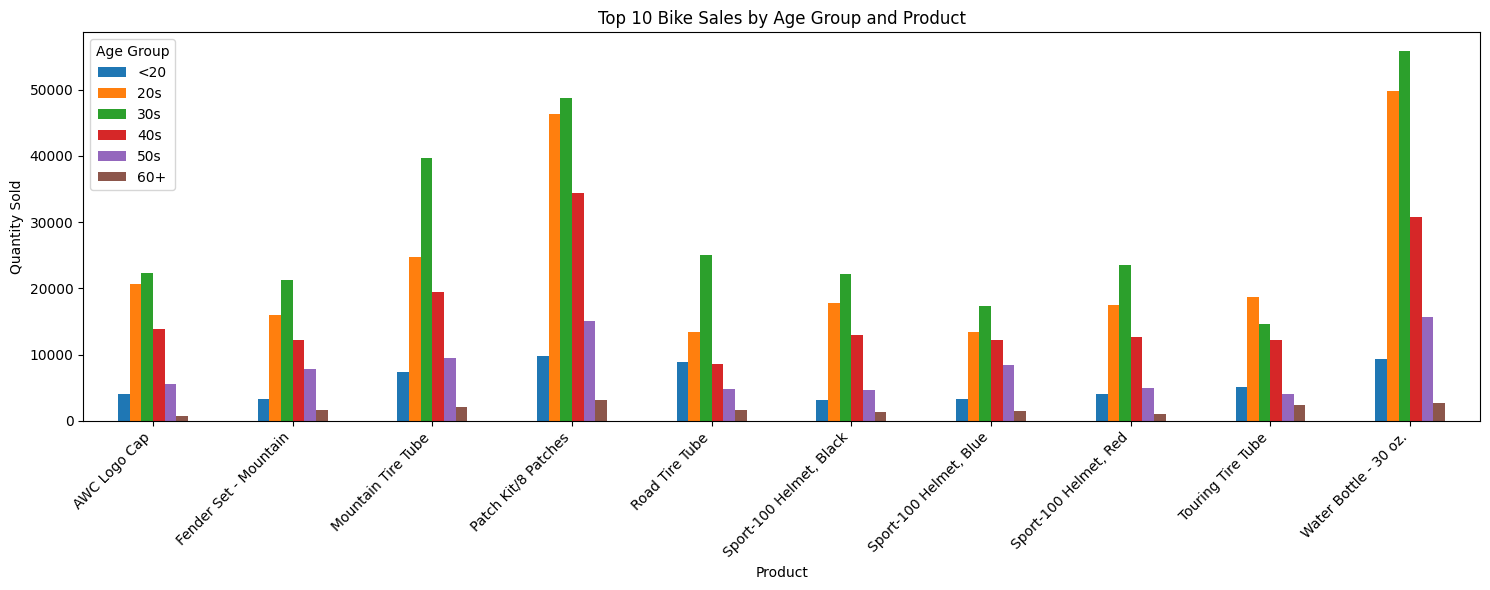

In [45]:
# 1. Identify the top 10 best-selling products
top_10_products = df.groupby('Product')['Order_Quantity'].sum().nlargest(10).index

# 2. Filter the DataFrame to include only these products
df_filtered = df[df['Product'].isin(top_10_products)]

# 3. Group the filtered data to create the new sales table
age_product_sales_filtered = df_filtered.groupby(['Age_Group', 'Product'])['Order_Quantity'].sum().unstack()

# 4. Create the bar chart with the filtered data
age_product_sales_filtered.T.plot(kind='bar', figsize=(15, 6))

plt.title('Top 10 Bike Sales by Age Group and Product')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

Sales by Country (Top 10 Countries)

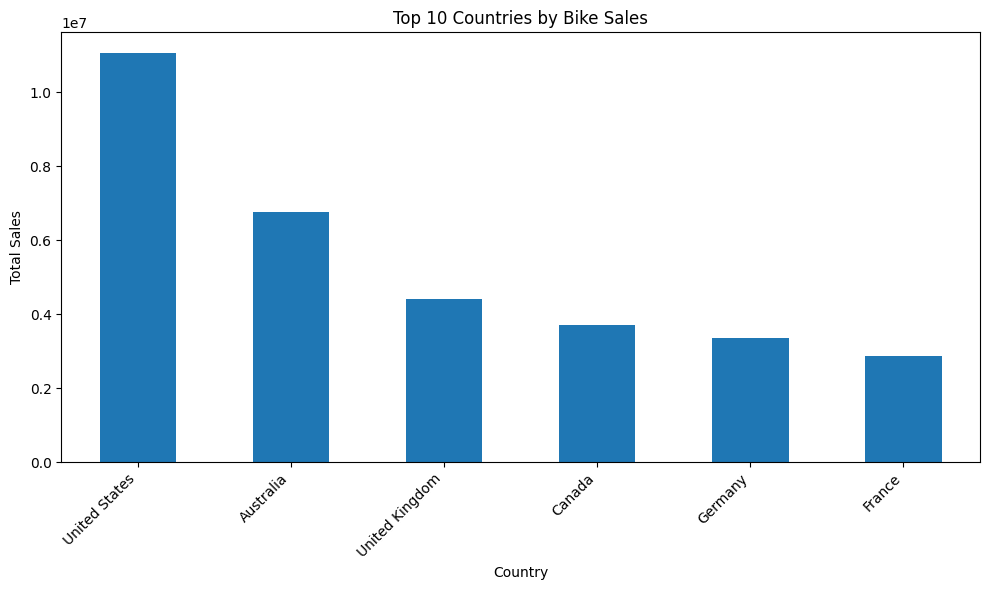

In [46]:
country_sales = df.groupby('Country')['Profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
country_sales.plot(kind='bar')
plt.title('Top 10 Countries by Bike Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Sales Heatmap by Country and Product

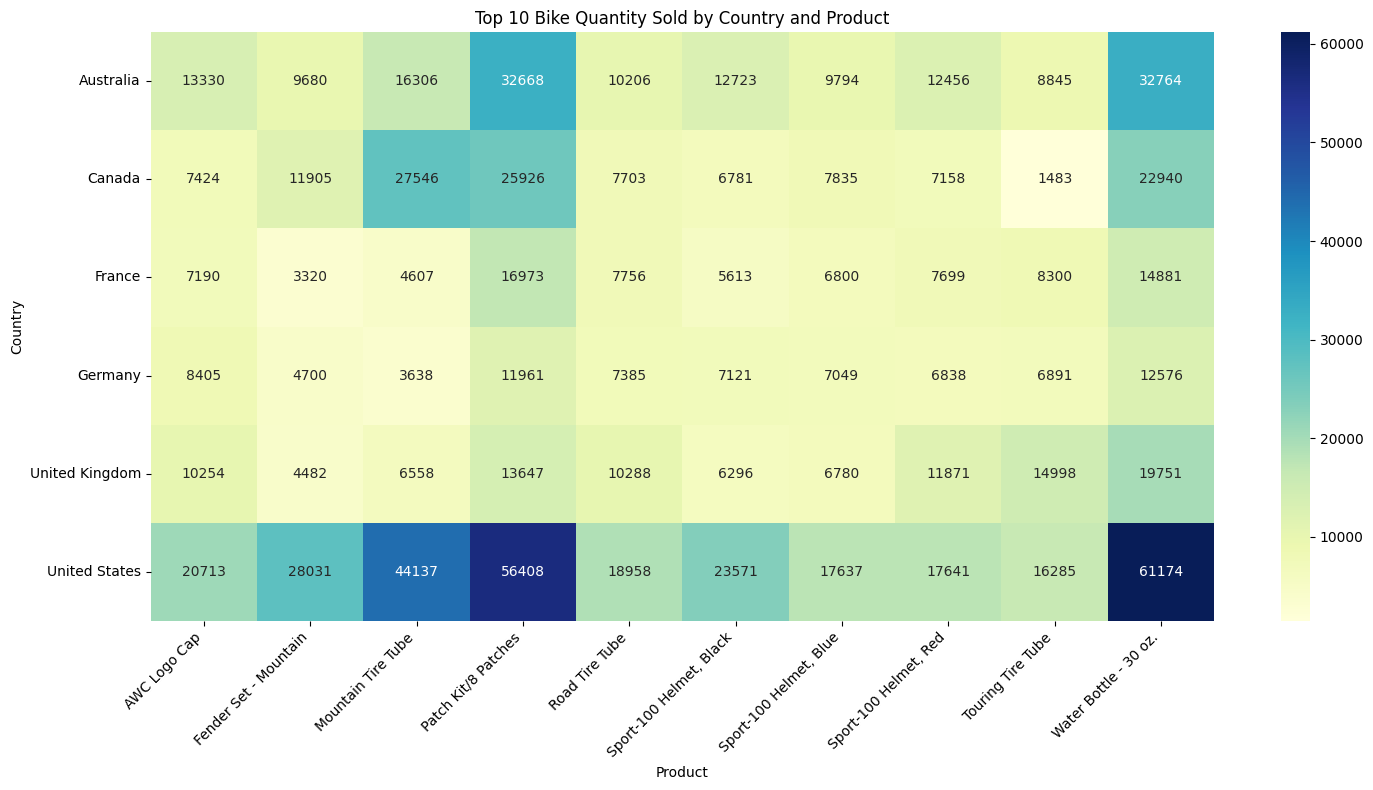

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Identify the top 10 best-selling products
top_10_products = df.groupby('Product')['Order_Quantity'].sum().nlargest(10).index

# 2. Filter the DataFrame to include only these products
df_filtered = df[df['Product'].isin(top_10_products)]

# 3. Create the pivot table with the filtered data
pivot = df_filtered.pivot_table(values='Order_Quantity', index='Country', columns='Product', aggfunc='sum', fill_value=0)

# 4. Create the heatmap with the filtered pivot table
plt.figure(figsize=(15, 8)) # Increase the figure size for better visualization
sns.heatmap(pivot, annot=True, fmt='g', cmap='YlGnBu')

plt.title('Top 10 Bike Quantity Sold by Country and Product')
plt.xlabel('Product')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right') # Rotate X-axis labels for better readability
plt.tight_layout()
plt.show()


# Conclusion of the analysis

Based on data from the best-selling products in Europe, we can conclude that the main sales markets worldwide are the United States (California), the United Kingdom (England), and Canada (British Columbia). Men outspend women by a narrow margin of 753,364 products (F: 15,733,868 M: 16,487,232). The products that could clearly generate the highest revenue in Europe would be:
-Montain-200 Black, 38 -Road-150 Red, 62 -Mountain-200 Silver, 42
The categories with the highest concentration of sales are bicycles, followed by accessories, and then clothing.
When analyzing by age, we can see that the focus of sales is on people between the ages of 20 and 30.
We conclude that within Europe, the places to focus on would be the United Kingdom, followed by Germany, and then France. Where products such as 30oz bottles, along with patch kits and tire tubes for mountain bikes, are the ones with the highest revenue over the years.
Also take into consideration with this analysis that although accessories are the best sellers, bicycles continue to be a strong source of total revenue from the data.